# Series de Tiempo -- R -- Introducción
Notas de clase sobre pronóstico de series de tiempo usando R

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia  

[Licencia]

[Readme]

**Software utilizado**.

> Este es un documento interactivo escrito como un notebook de [Jupyter](http://jupyter.org), en el cual se presenta un tutorial sobre ---- /// la extracción, transformación, visualización y carga de datos usando **R** en el contexto de la ciencia de los datos /// ----. Los notebooks de Jupyter permiten incoporar simultáneamente código, texto, gráficos y ecuaciones. El código presentado en este notebook puede ejecutarse en los sistemas operativos Linux y OS X.

> Haga click [aquí](https://github.com/jdvelasq/guias-de-instalacion) para obtener instrucciones detalladas sobre como instalar Jupyter en Windows y Mac OS X.

> Haga clic [aquí] para ver la última versión de este documento en nbviewer.

> Descargue la última versión de este documento a su disco duro; luego, carguelo y ejecutelo en línea en [Try Jupyter!](https://try.jupyter.org)

> Haga clic [aquí](https://github.com/jdvelasq/ETVL-R/blob/master/ETVL-R-5-visualizacion-1-base.ipynb) para ver el tutorial de visualización y gráficas.

#### Contenido

> 
* [Adquisición de datos en R](#Adquisición-de-datos-en-R)
* [Graficación de series de tiempo](#Graficación-de-series-de-tiempo)
* [Time-Series Objects en R](#Time-Series-Objects-en-R)
* [Manipulación de fechas](#Manipulación-de-fechas)   




**Bibliografía**.

> 

**Material complementario.**
> Webinar RStudio [Getting your data into R](https://www.rstudio.com/resources/webinars/getting-your-data-into-r/) 

---



# Adquisición de datos en R

[Contenido](#Contenido)

R permite adquirir datos de diversas fuentes incluyendo archivos de texto, excel y bases de datos, entre otros. Un tutorial sobre este tema está disponible en https://github.com/jdvelasq/ETVL-R/blob/master/ETVL-R-3-extraccion.ipynb; las funciones descritas en él son válidas para leer datos de series de tiempo.

# Graficación de series de tiempo

[Contenido](#Contenido)

R tiene tres librerías básicas para la preparación de gráficos estadísticos: base, lattice y ggplot2. Un tutorial detallado está disponible en https://github.com/jdvelasq/ETVL-R/blob/master/ETVL-R-5-visualizacion-1-base.ipynb,  https://github.com/jdvelasq/ETVL-R/blob/master/ETVL-R-5-visualizacion-2-lattice.ipynb y https://github.com/jdvelasq/ETVL-R/blob/master/ETVL-R-5-visualizacion-3-ggplot2.ipynb; las funciones descritas en estos tutoriales son válidas para leer datos de series de tiempo. 

# Time-Series Objects en R

[Contenido](#Contenido)

> [`ts {stats}`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/ts.html)  

Esta función permite manejar objetos `Time-Series`, los cuales tienen asociada un fecha a los datos.

In [1]:
## crea un objeto ts a partir de un vector de aleatorios normales
x <- ts(data = cumsum(rnorm(20)),   # genera los datos aleatorios
        start = c(1959, 2),         # 2do trimestre de 1959
        frequency = 4)              # trimestrales

## imprime -- note el formato de impresión
print(x)      

            Qtr1        Qtr2        Qtr3        Qtr4
1959             -0.31372182  0.07005455 -0.86613198
1960 -0.47717056 -0.62143844 -0.59515931  1.96602976
1961  1.75669492  2.21438296  3.44382150  4.22049476
1962  3.85804918  3.51094926  4.80093418  2.81879041
1963  4.42819310  5.18347376  5.19082409  5.95094520
1964  6.95762826                                    


In [2]:
## Instale y cargue la librería
library(Cairo)

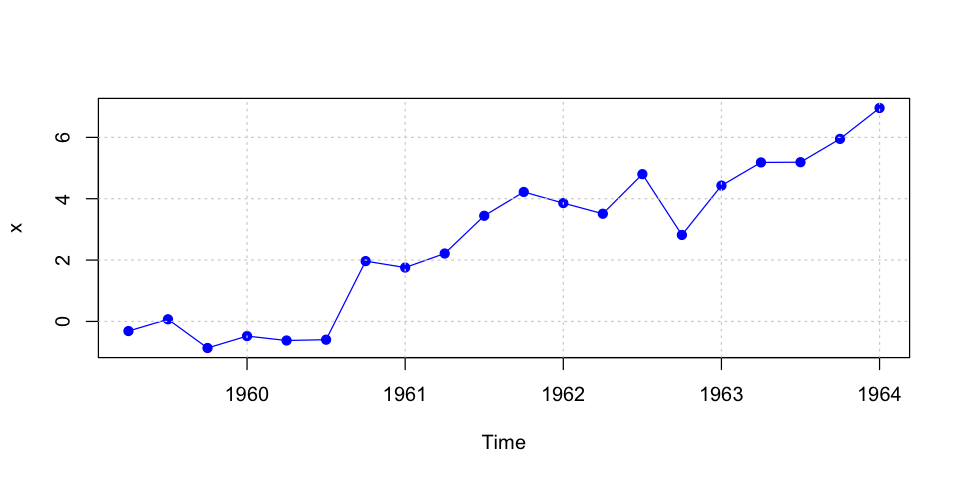

In [8]:
## grafica la serie -- llama a la función plot.ts()

options(repr.plot.width=8, repr.plot.height=4)

plot(x,              # los datos
     type = 'o',     # tipo de gráfico: o - overplotted
     pch = 19,       # tipo de marcador de los puntos
     col = 'blue')   # color de la serie

grid()               # hace visible la malla

In [4]:
## retorna la fecha para cada observación
time(x)

        Qtr1    Qtr2    Qtr3    Qtr4
1959         1959.25 1959.50 1959.75
1960 1960.00 1960.25 1960.50 1960.75
1961 1961.00 1961.25 1961.50 1961.75
1962 1962.00 1962.25 1962.50 1962.75
1963 1963.00 1963.25 1963.50 1963.75
1964 1964.00                        

In [5]:
## retorna la posición del ciclo para cada observación
cycle(x)

     Qtr1 Qtr2 Qtr3 Qtr4
1959         2    3    4
1960    1    2    3    4
1961    1    2    3    4
1962    1    2    3    4
1963    1    2    3    4
1964    1               

In [6]:
## retorna la frecuencia
frequency(x)

[1] 4

In [7]:
## retorna el delta de tiempo entre observaciones
deltat(x)

[1] 0.25

In [8]:
## window extrae una porción de los datos
print(x) # datos originales

            Qtr1        Qtr2        Qtr3        Qtr4
1959             -0.19385627 -1.66388113 -0.40384954
1960 -0.33989157 -1.49343368 -0.83526760 -1.61490370
1961 -2.40484186 -2.65026050 -3.74819516 -3.79661687
1962 -4.36602983 -3.27940074 -1.78526230  0.19429861
1963 -0.82941124  0.03112894  0.32589238  0.20864200
1964  0.68487610                                    


In [9]:
window(x,              # los datos
       deltat = 0.5)   # el incremento (compare con la celda anterior)

Time Series:
Start = 1959.25 
End = 1963.75 
Frequency = 2 
 [1] -0.19385627 -0.40384954 -1.49343368 -1.61490370 -2.65026050 -3.79661687
 [7] -3.27940074  0.19429861  0.03112894  0.20864200

In [10]:
window(x,                   # los datos
       start = c(1960,1),   # fecha inicial
       end   = c(1963,4))   # fecha final

            Qtr1        Qtr2        Qtr3        Qtr4
1960 -0.33989157 -1.49343368 -0.83526760 -1.61490370
1961 -2.40484186 -2.65026050 -3.74819516 -3.79661687
1962 -4.36602983 -3.27940074 -1.78526230  0.19429861
1963 -0.82941124  0.03112894  0.32589238  0.20864200

In [11]:
## se genera una serie con datos mensuales
y <- ts(data = cumsum(rnorm(84)),   # genera los datos aleatorios
        start = c(1958, 1),         # enero de 1958
        frequency = 12)             # datos mensuales

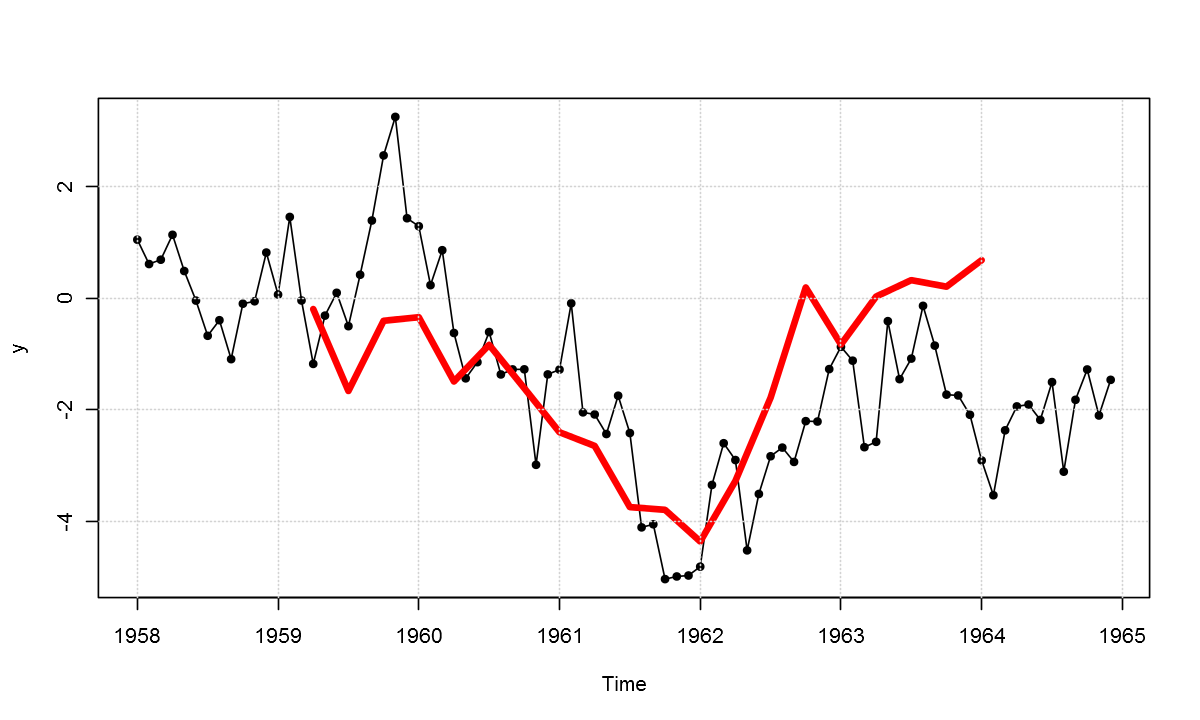

In [12]:
## una de las utilidades de ts es que permite graficar
## series correctamente alineadas en el tiempo

options(repr.plot.width=10, repr.plot.height=6)

plot(y,                             # la serie `y` es mas larga y cubre la serie `x`
     type = 'o',                    # tipo de gráfico
     ylim = c(min(x,y), max(x,y)),  # límites máximo y mínimo del eje `Y`
     pch = 20)

lines(x,                            # la serie `y` 
      col = 'red',                  # color
      lwd = 4)                      # grueso de la línea

grid()

> [`str {stats}`](https://stat.ethz.ch/R-manual/R-devel/library/utils/html/str.html)  

In [13]:
## información del tipo de objeto
str(x)

 Time-Series [1:20] from 1959 to 1964: -0.194 -1.664 -0.404 -0.34 -1.493 ...


In [14]:
## se puede acceder a las componentes de un objeto series de tiempo
## como si fuese un vector
x[2:4]

[1] -1.6638811 -0.4038495 -0.3398916

---

**Ejercicio.--** Un archivo de texto tiene el siguiente contenido:

       yr qr x
       91 1 10
       91 2 16
       91 3 20
       91 4 24
       92 1 29
       92 2 32
       92 3 40
       92 4 43
       93 1 49
       93 2 51
       93 3 62
       93 4 64
       94 1 71
       94 2 77
       94 3 80
       94 4 85
       
Cree un objeto `Time-Series` con los datos y grafique la serie.

     Qtr1 Qtr2 Qtr3 Qtr4
1991   10   16   20   24
1992   29   32          


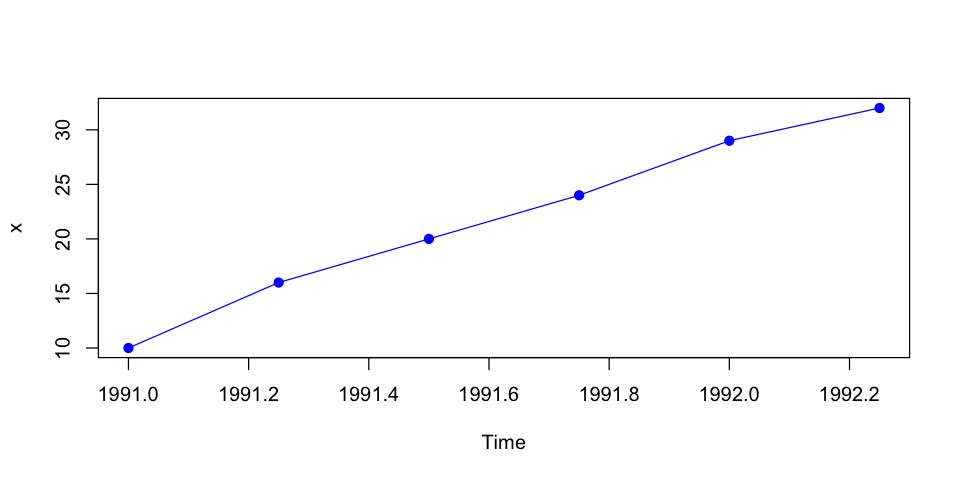

In [10]:
x <- ts(data = c(10, 16, 20, 24, 29, 32),   # genera los datos aleatorios
        start = c(1991, 1),         # 2do trimestre de 1959
        frequency = 4)              # trimestrales

## imprime -- note el formato de impresión
print(x)
plot(x,
     type = 'o',     # tipo de gráfico: o - overplotted
     pch = 19,       # tipo de marcador de los puntos
     col = 'blue')   # color de la serie

**Ejercicio.--** El archivo `files/trm.dat` contiene los datos diarios de la tasa de cambio representativa del mercado colombiano entre el 01 de Enero de 2005 y el 01 de Enero de 2016. Lea los datos, cree un objeto de series de tiempo y grafique la serie. 

**Ejercicio.--** El archivo `files/google.dat` contiene los datos mensuales de la cotización de la acción de Google Inc. en el mercado americano desde el 03 de Enero de 2007 hasta el 04 de Enero de 2016. Lea los datos y en una misma figure grafique las series `open` y `close`.

---

# Manipulación de fechas

[Contenido](#Contenido)

> [`as.Date {base}`](https://stat.ethz.ch/R-manual/R-devel/library/base/html/as.Date.html)  

En el trabajo con series de tiempo es común la lectura de datos con fechas en diferentes formatos, así como su manipulación. En esta sección se aborda el problema de la manipulación de las fechas. La función `as.Date` permite este trabajo.

In [15]:
Sys.Date()  # retorna la fecha actual

[1] "2016-09-30"

In [16]:
## el argumento format permite especificar el formato de la fecha así:
##
##  `%d` -- Dia del mes (numero decimal)
##  `%m` -- Mes (numero decimal)
##  `%b` -- Mes abreviado
##  `%B` -- Mes completo
##  `%y` --  Año con 2 digitos
##  `%Y` -- Año con 4 digitos
##
x <- c("1jan1960", "2JAN1960", "31mar1960", "30jul1960")
as.Date(x, format = "%d%b%Y") # %d -- dia como numero, %b -- mes abreviado, %Y -- año con 4 dígitos

[1] NA           NA           "1960-03-31" "1960-07-30"

In [17]:
## datos en formato 'm/d/y'
x <- c("02/27/92", "02/27/92", "01/14/92", "02/28/92", "02/01/92")
as.Date(x, "%m/%d/%y")

[1] "1992-02-27" "1992-02-27" "1992-01-14" "1992-02-28" "1992-02-01"

In [18]:
## fecha como numero de días desde 1900-01-01 
as.Date(32768, origin = "1900-01-01")

[1] "1989-09-19"

In [19]:
## Mes completo dia, Año
as.Date('April 26, 2001', format='%B %d, %Y')  

[1] NA

In [20]:
## Generacion  de un vector de fechas
seq( as.Date("1956/1/1"), # Utiliza as.Date para el formato fechas
     length.out = 10,     # Longitud de los datos
     by="months")         # Organizado por meses  

 [1] "1956-01-01" "1956-02-01" "1956-03-01" "1956-04-01" "1956-05-01"
 [6] "1956-06-01" "1956-07-01" "1956-08-01" "1956-09-01" "1956-10-01"

In [21]:
## Generacion  de un vector de fechas
seq( as.Date("1956/1/1"), # Utiliza as.Date para el formato fechas
     length.out = 10,     # Longitud de los datos
     by="weeks")          # Organizado por semanas 

 [1] "1956-01-01" "1956-01-08" "1956-01-15" "1956-01-22" "1956-01-29"
 [6] "1956-02-05" "1956-02-12" "1956-02-19" "1956-02-26" "1956-03-04"

---

**Ejercicio.--** Genere un vector de fechas desde el 03 de Enero de 2007 hasta el 04 de Enero de 2016 con frecuencia mensual.

**Ejercicio.--** Genere un vector de fechas de periodicidad diaria desde el 1 de Enero de 2005 hasta el 1 de Enero de 2016

---

> [`strptime {base}`](https://stat.ethz.ch/R-manual/R-devel/library/base/html/strptime.html)  
 [`as.POSIX*  {base}`](https://stat.ethz.ch/R-manual/R-devel/library/base/html/as.POSIXlt.html) 

En ocasiones puede ser que al leer un archivo que contenga fechas estas no sean leidas de forma correcta en `R`, por lo cual se hace necesario especificarle al programa que tipo de clase son los datos para poder realizar operaciones y evitar algún tipo de error.

La función `strptime` permite hacer converciones entre representaciones de caracteres y objetos de clase `POSIXlt` Y `POSIXct` que representan las fechas de calendario y horas.

In [22]:
## Se crea la varible Date con una fecha.
x <- "2016-01-01"
str(x) 

 chr "2016-01-01"


Se debe buscar la de convertir esta variable de manera que pueda ser empleada correctamente por el usuario y el software.

In [23]:
newdate <- strptime(x,                      # Argumento que contiene los datos.
                    format=("%Y-%m-%d"))    # Se especifica que formato necesita.  
newdate
str(newdate)

[1] "2016-01-01 COT"

 POSIXlt[1:1], format: "2016-01-01"


Los formatos `POSIXlt` Y `POSIXct` permiten un mejor manejo cuando se trata de manipular tiempo en `R`, ya que estos formatos están diseñados para su manipulación.

In [24]:
v1 <- as.POSIXlt("2016-01-01")  
v2 <- as.POSIXlt("2016-06-01")  

v2-v1 

Time difference of 152 days

In [25]:
## uno de los usos de as.Date es construir gráficos con el eje X especicado como fechas
## La variable AirPassengers contiene un objeto `Time-Series`
AirPassengers

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432

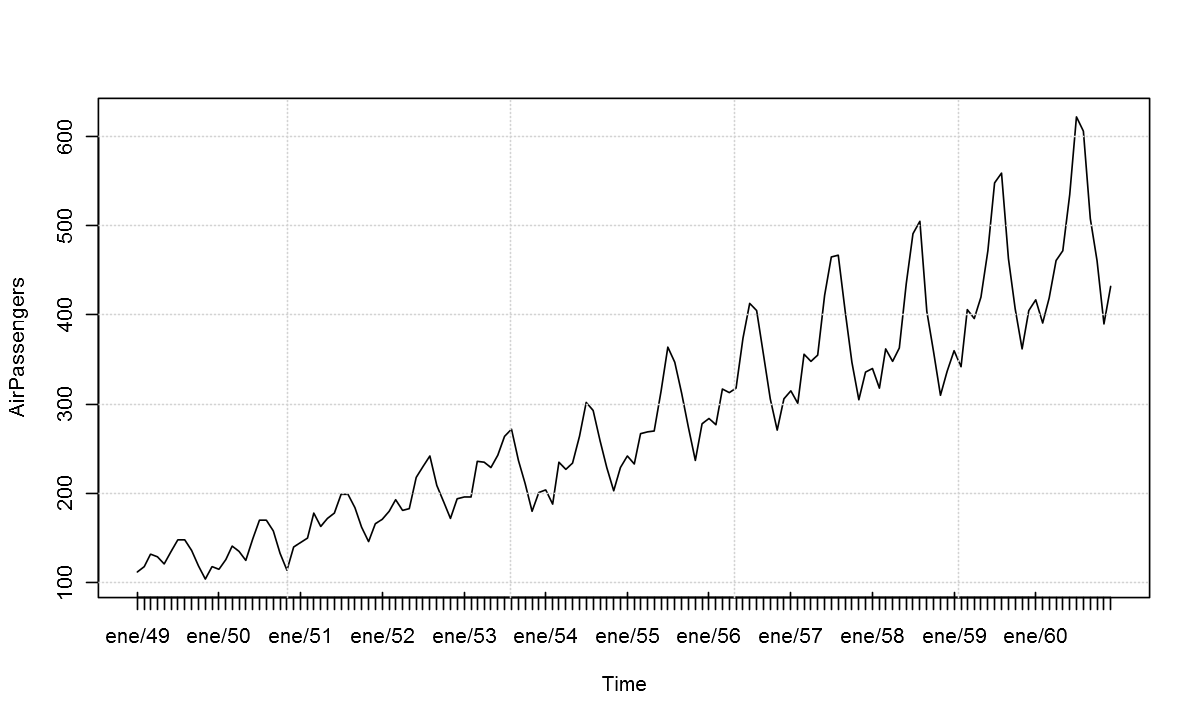

In [26]:
## gráfica de la serie de tiempo 
## con fechas

f= seq(as.Date("1949/1/1"),                        # Utiliza as.Date para el formato fechas
       length.out= length(AirPassengers),          # Longitud de los datos
       by="months")                                # Organizado por meses  
 
np = length(AirPassengers)

month = seq(f[1],                                  # Secuencia de meses
            f[np], 
            by= "months")

year = seq(f[1],                                   # Secuencia de años
           f[np], 
           by= "years")

options(repr.plot.width=10, repr.plot.height=6)

plot(f,                                             # Fechas de la serie 
     AirPassengers,                                 # Datos
     xlab="Time",                                   # Nombre eje x
     type="l",                                      # Tipo de grafica
     xaxt="n")                                      # xaxt="n" suprime eje x

## Agregando eje x
axis.Date(1, at=month, format="%b/%y")              # Eje x-Mes
axis.Date(1, at=year, labels = FALSE, tcl = 0.2)    # Eje x-Año


grid()

---

**Ejercicio.--** El archivo `files/sutter.dat` contiene los datos de la serie mensual de mano de obra en el condado de Sutter a partir de enero de 1946. Cargue la serie y grafíquela usando un objeto TS.  

---

[Contenido](#Contenido)